In [2]:
import pandas as pd

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [3]:
test.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459



date_time : 일별 날짜 <br>
wind_direction: 풍향 (degree) <br>
sky_condition : 하늘 상태 (하단 설명 참조) <br>
precipitation_form : 강수 형태 (하단 설명 참조) <br>
wind_speed : 풍속 (m/s) <br>
humidity : 습도 (%) <br>
low_temp : 최저 기온 ( C) <br>
high_temp : 최고 기온 ( C) <br>
Precipitation_Probability : 강수 확률 (%) <br>
number_of_rentals : 따릉이 대여량 <br>


기상 데이터는 하루에 총 8번 3시간 간격으로 발표되는 기상단기예보(SHRT) 데이터를 1일 평균으로 변환한 데이터입니다.<br>
2019년 6월 4일 까지 sky_condition (하늘 상태) 코드  : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)<br>
2020년  sky_condition (하늘 상태) 코드  : 맑음(1), 구름많음(3), 흐림(4)<br>
precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)<br>
원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.

In [4]:
train.info()
# 날짜 값만 바꿔주면 될 것 같다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


In [5]:
test.info()
# number_of_rentals가 레이블값인것 같다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  91 non-null     object 
 1   wind_direction             91 non-null     float64
 2   sky_condition              91 non-null     float64
 3   precipitation_form         91 non-null     float64
 4   wind_speed                 91 non-null     float64
 5   humidity                   91 non-null     float64
 6   low_temp                   91 non-null     float64
 7   high_temp                  91 non-null     float64
 8   Precipitation_Probability  91 non-null     float64
dtypes: float64(8), object(1)
memory usage: 6.5+ KB


In [6]:
train.tail()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053
272,2020-06-30,120.797,3.622,0.432,5.574,77.061,19.125,26.053,41.284,38086


In [7]:
# 날짜 데이트 객체로 변환
train['date_time'] = pd.to_datetime(train['date_time'])
test['date_time'] = pd.to_datetime(test['date_time'])

In [8]:
# 연 월 일 저장

train['year'] = train['date_time'].dt.year
test['year'] = test['date_time'].dt.year

train['month'] = train['date_time'].dt.month
test['month'] = test['date_time'].dt.month

train['day'] = train['date_time'].dt.day
test['day'] = test['date_time'].dt.day

In [9]:
# 요일 저장

train['daysOfWeek'] = train['date_time'].dt.day_name().str[:2].map({'Mo' : 0, 'Tu' : 1, 'We' : 2, 'Th' : 3, 'Fr' : 4, 'Sa' : 5, 'Su' : 6})
test['daysOfWeek'] = test['date_time'].dt.day_name().str[:2].map({'Mo' : 0, 'Tu' : 1, 'We' : 2, 'Th' : 3, 'Fr' : 4, 'Sa' : 5, 'Su' : 6})

In [10]:
# 원래 날짜는 삭제

train = train.drop(['date_time'], axis=1)
test = test.drop(['date_time'], axis=1)

In [11]:
# 코로나 여부 칼럼 생성 

train['covid'] = 0
test['covid'] = 0

train.loc[(train['year'] == 2020) & (train['month'] >= 2), "covid"] = 1
train.loc[train['year'] > 2020, "covid"] = 1
test.loc[(test['year'] == 2020) & (test['month'] >= 2), "covid"] = 1
test.loc[test['year'] > 2020, "covid"] = 1

In [12]:
# 날씨 관련 칼럼 생성

# 일교차
train['temp_diff_info'] = train['high_temp'] - train['low_temp']
test['temp_diff_info'] = test['high_temp'] - test['low_temp']
# 덥고 습한 정도
train['sweat_info'] = train['high_temp'] * train['humidity']
test['sweat_info'] = test['high_temp'] * test['humidity']
# 춥고 바람부는 날씨
train['cold_info'] = train['low_temp'] * train['wind_speed']
test['cold_info'] = test['low_temp'] * test['wind_speed']

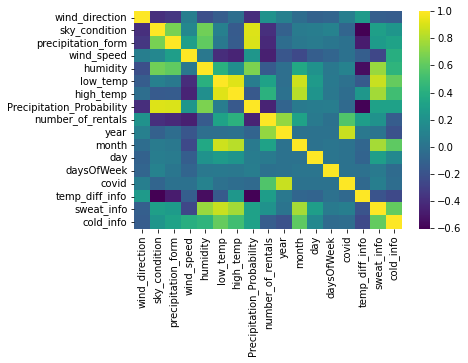

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# 상관관계
corr = train.corr()
sns.heatmap(corr, cmap='viridis')
plt.show()

In [14]:
# 상관관계

corr = train.corr()
corr['number_of_rentals']

wind_direction               0.209996
sky_condition               -0.384234
precipitation_form          -0.420458
wind_speed                  -0.464761
humidity                    -0.147824
low_temp                     0.317741
high_temp                    0.423113
Precipitation_Probability   -0.449225
number_of_rentals            1.000000
year                         0.739011
month                        0.320019
day                          0.050760
daysOfWeek                  -0.007583
covid                        0.559305
temp_diff_info               0.281452
sweat_info                   0.210250
cold_info                   -0.134662
Name: number_of_rentals, dtype: float64

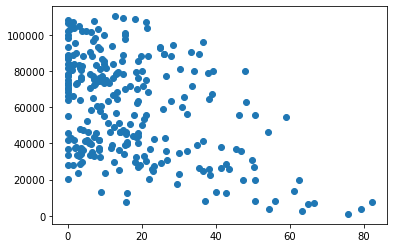

In [15]:
# 그래프로 이상치를 찾기는 뭔가 어렵다

plt.scatter(x=train['Precipitation_Probability'], y=train['number_of_rentals'])

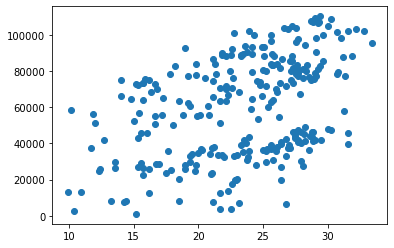

In [16]:
plt.scatter(x=train['high_temp'], y=train['number_of_rentals'])

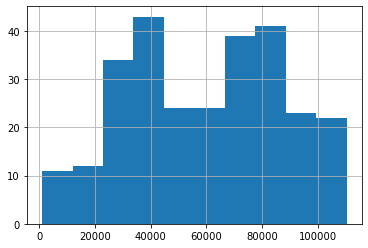

In [17]:
# y 값은 로그변환을 했더니 더욱 치우친 값이 나와서 이걸로 사용

train['number_of_rentals'].hist()

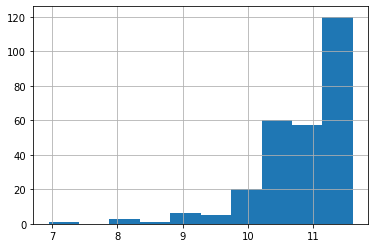

In [18]:
import numpy as np

np.log1p(train['number_of_rentals']).hist()

(array([13., 38., 56., 76., 37., 24., 15.,  6.,  5.,  3.]),
 array([0.753 , 1.2384, 1.7238, 2.2092, 2.6946, 3.18  , 3.6654, 4.1508,
        4.6362, 5.1216, 5.607 ]),
 <a list of 10 Patch objects>)

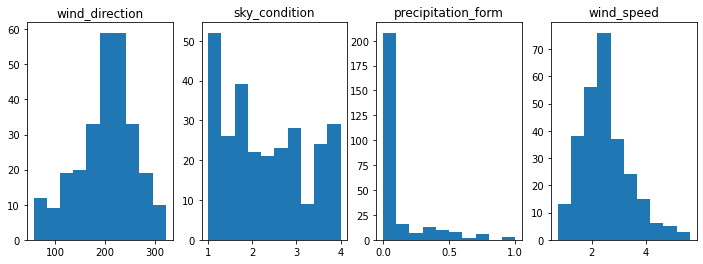

In [19]:
# x 값들의 데이터 분포를 살펴보자!

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (12, 4), nrows=1, ncols=4)

ax1.set_title('wind_direction')
ax1.hist(train['wind_direction'])

ax2.set_title('sky_condition')
ax2.hist(train['sky_condition'])

ax3.set_title('precipitation_form')
ax3.hist(train['precipitation_form'])

ax4.set_title('wind_speed')
ax4.hist(train['wind_speed'])

(array([104.,  65.,  38.,  21.,  17.,  11.,   8.,   5.,   1.,   3.]),
 array([ 0.    ,  8.2162, 16.4324, 24.6486, 32.8648, 41.081 , 49.2972,
        57.5134, 65.7296, 73.9458, 82.162 ]),
 <a list of 10 Patch objects>)

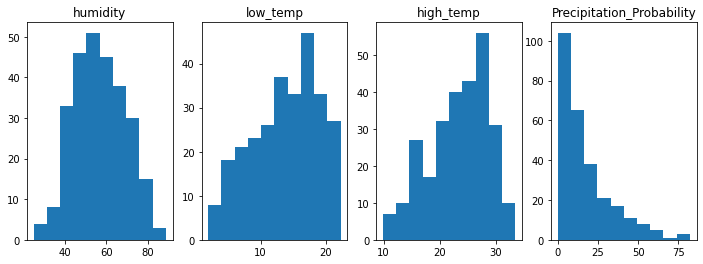

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (12, 4), nrows=1, ncols=4)

ax1.set_title('humidity')
ax1.hist(train['humidity'])

ax2.set_title('low_temp')
ax2.hist(train['low_temp'])

ax3.set_title('high_temp')
ax3.hist(train['high_temp'])

ax4.set_title('Precipitation_Probability')
ax4.hist(train['Precipitation_Probability'])

In [21]:
# 테스트 데이터 라벨값 찾음 ㅋㅋ

test_y = pd.read_csv('./data/y_train.csv', encoding='cp949')
test['number_of_rentals'] = test_y['대여건수']

In [22]:
from sklearn.model_selection import train_test_split

X_train = train.drop('number_of_rentals', axis=1)
y_train = train['number_of_rentals']
X_test = test.drop('number_of_rentals', axis=1)
y_test = test['number_of_rentals'].astype('int64')

X_train

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,daysOfWeek,covid,temp_diff_info,sweat_info,cold_info
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1,6,0,8.400,1575.000000,38.430000
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,2,0,0,6.188,1326.827000,41.997736
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,3,1,0,5.004,1146.846764,27.739280
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,4,2,0,4.056,888.628432,26.083056
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,5,3,0,4.546,768.903064,18.717750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,2020,6,26,4,1,7.026,2157.432828,46.555500
269,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,2020,6,27,5,1,8.030,2261.558904,37.336728
270,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,2020,6,28,6,1,8.053,2113.199008,38.220000
271,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,2020,6,29,0,1,6.375,1832.298000,40.093875


In [23]:
# 중간에 모델 돌렸었는데 year의 회귀 계수가 너무 높다
# 뭔가 이상하다 바꿔보자
# year를 원핫 인코딩을 하려니...

X_train['year_2018'] = 0
X_test['year_2018'] = 0

X_train['year_2019'] = 0
X_test['year_2019'] = 0

X_train['year_2020'] = 0
X_test['year_2020'] = 0

X_train['year_2021'] = 0
X_test['year_2021'] = 0

X_train.loc[X_train['year']==2018, "year_2018"] = 1
X_train.loc[X_train['year']==2019, "year_2019"] = 1
X_train.loc[X_train['year']==2020, "year_2020"] = 1
X_train.loc[X_train['year']==2021, "year_2021"] = 1

X_test.loc[X_test['year']==2018, "year_2018"] = 1
X_test.loc[X_test['year']==2019, "year_2019"] = 1
X_test.loc[X_test['year']==2020, "year_2020"] = 1
X_test.loc[X_test['year']==2021, "year_2021"] = 1

X_train = X_train.drop('year', axis=1)
X_test = X_test.drop('year', axis=1)

In [24]:
# 로그 변환을 한 결과가 더 좋게 나왔다. (선형 0.55 -> 0.51, 릿지 0.55 -> 0.57, 라쏘 0.54 -> 0.47)

X_train = np.log1p(X_train)
y_train = np.log1p(y_train)
X_test = np.log1p(X_test)
y_test = np.log1p(y_test)

In [25]:
# 나중에 없애기로 결정
# 선형 0.51 릿지 0.51 라쏘 0.42 => 모두 0.41

X_train = X_train.drop('year_2018', axis=1)
X_test = X_test.drop('year_2018', axis=1)

X_train = X_train.drop('year_2019', axis=1)
X_test = X_test.drop('year_2019', axis=1)

X_train = X_train.drop('year_2020', axis=1)
X_test = X_test.drop('year_2020', axis=1)

X_train = X_train.drop('year_2021', axis=1)
X_test = X_test.drop('year_2021', axis=1)

In [29]:
# 평가함수

def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [30]:
# model 별로 평가 수행
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.001)
lasso_reg = Lasso(alpha=0.0005)


lr_reg.fit(X_train, y_train)
pred = np.expm1(lr_reg.predict(X_test))

ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

pred_ridge = np.expm1(ridge_reg.predict(X_test))
pred_lasso = np.expm1(lasso_reg.predict(X_test))

print(NMAE(np.expm1(y_test), pred))
print('릿지 : ', NMAE(np.expm1(y_test), pred_ridge))
print('라쏘 : ', NMAE(np.expm1(y_test), pred_lasso))

0.389216516920296
릿지 :  0.39260330757368117
라쏘 :  0.39884281436433705


In [31]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.001, 0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.5216, 최적 alpha:{'alpha': 0.001}


C:\Users\korea_1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.36031057389135945, tolerance: 0.004540063023865147
  positive)
C:\Users\korea_1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05758536325400243, tolerance: 0.011916206823642916
  positive)
C:\Users\korea_1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5306022248773381, tolerance: 0.011714064621596527
  positive)
C:\Users\korea_1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Lasso 5 CV 시 최적 평균 RMSE 값: 0.5262, 최적 alpha:{'alpha': 0.0001}


C:\Users\korea_1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7346528972695054, tolerance: 0.01287503534260313
  positive)


In [32]:
# model 별로 평가 수행
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.001)
lasso_reg = Lasso(alpha=0.0001)


lr_reg.fit(X_train, y_train)
pred = np.expm1(lr_reg.predict(X_test))

ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

pred_ridge = np.expm1(ridge_reg.predict(X_test))
pred_lasso = np.expm1(lasso_reg.predict(X_test))

print(NMAE(np.expm1(y_test), pred))
print('릿지 : ', NMAE(np.expm1(y_test), pred_ridge))
print('라쏘 : ', NMAE(np.expm1(y_test), pred_lasso))

0.389216516920296
릿지 :  0.39260330757368117
라쏘 :  0.39508402869876824


C:\Users\korea_1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7346528972695054, tolerance: 0.01287503534260313
  positive)


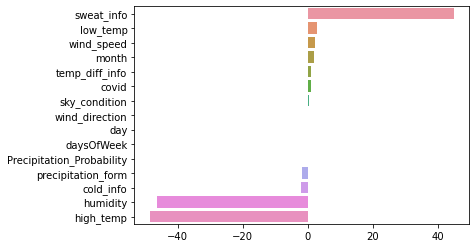

In [33]:
coef = pd.Series(lr_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

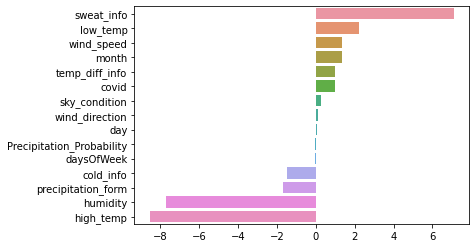

In [34]:
coef = pd.Series(ridge_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

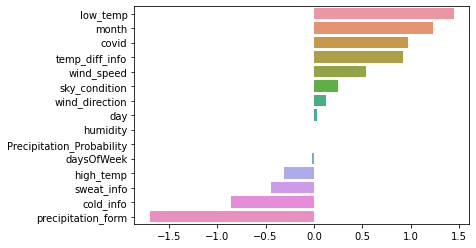

In [35]:
coef = pd.Series(lasso_reg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [36]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

pred_xgb = np.expm1(xgb_reg.predict(X_test))
pred_lgbm = np.expm1(lgbm_reg.predict(X_test))

print('XGB : ', NMAE(np.expm1(y_test), pred_xgb))
print("LGBM : ", NMAE(np.expm1(y_test), pred_lgbm))

[19:29:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB :  0.42328868442220746
LGBM :  0.3354228938570134


In [37]:
xgb_reg = XGBRegressor(n_estimators=2000, learning_rate=0.01, 
                       colsample_bytree=0.5, subsample=0.8)

xgb_reg.fit(X_train, y_train)
pred_xgb = np.expm1(xgb_reg.predict(X_test))
print('XGB : ', NMAE(np.expm1(y_test), pred_xgb))

[19:29:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB :  0.3972208911813734


In [39]:
lgbm_reg = LGBMRegressor(n_estimators=20000, learning_rate=0.1, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

lgbm_reg.fit(X_train, y_train)
pred_lgbm = np.expm1(lgbm_reg.predict(X_test))
print("LGBM : ", NMAE(np.expm1(y_test), pred_lgbm))

LGBM :  0.3074277164370145


In [40]:
X_train

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,month,day,daysOfWeek,covid,temp_diff_info,sweat_info,cold_info
0,5.339939,1.609438,0.000000,1.398717,4.330733,2.610070,3.091042,3.433987,1.609438,0.693147,1.945910,0.000000,2.240710,7.362645,3.674527
1,5.343850,1.373716,0.000000,1.453486,4.260325,2.625538,2.995732,3.020425,1.609438,1.098612,0.000000,0.000000,1.972413,7.191299,3.761147
2,5.368384,1.363793,0.000000,1.305626,4.329140,2.425864,2.792146,3.001366,1.609438,1.386294,0.693147,0.000000,1.792426,7.045643,3.358265
3,4.975602,1.545859,0.354172,1.420213,4.288389,2.231304,2.592864,3.795332,1.609438,1.609438,1.098612,0.000000,1.620576,6.790804,3.298908
4,4.573731,1.609438,0.544067,1.431746,4.314604,1.927892,2.435454,4.164772,1.609438,1.791759,1.386294,0.000000,1.713077,6.646265,2.981519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,5.436609,1.605430,0.201307,1.185096,4.374221,3.068053,3.350816,3.623968,1.945910,3.295837,1.609438,0.693147,2.082686,7.677138,3.861897
269,5.341233,1.351962,0.077887,1.027474,4.374649,3.082460,3.395917,3.094718,1.945910,3.332205,1.791759,0.693147,2.200552,7.724252,3.646408
270,5.647452,1.004302,0.000000,1.036737,4.300491,3.091042,3.402962,2.115894,1.945910,3.367296,1.945910,0.693147,2.203096,7.656431,3.669187
271,4.927449,1.180807,0.084341,1.112844,4.269320,3.026504,3.295837,2.805842,1.945910,3.401197,0.000000,0.693147,1.998096,7.513872,3.715859
